## 데이터 불러오기와 데이터셋 나누기
### Calling the Data and Dividing them

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [3]:
data=pd.read_csv('상장비상장(2008_2013).csv',header=None,skiprows=1)

In [4]:
input = data.iloc[:,2:37].values
output = data.iloc[:,[37]].values 

In [5]:
import numpy as np
from matplotlib import pyplot as plt

scatter_x = data.iloc[:,18].values
scatter_y = data.iloc[:,20].values
group = data.iloc[:,-1].values
cdict = {0:'blue',1:'red'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

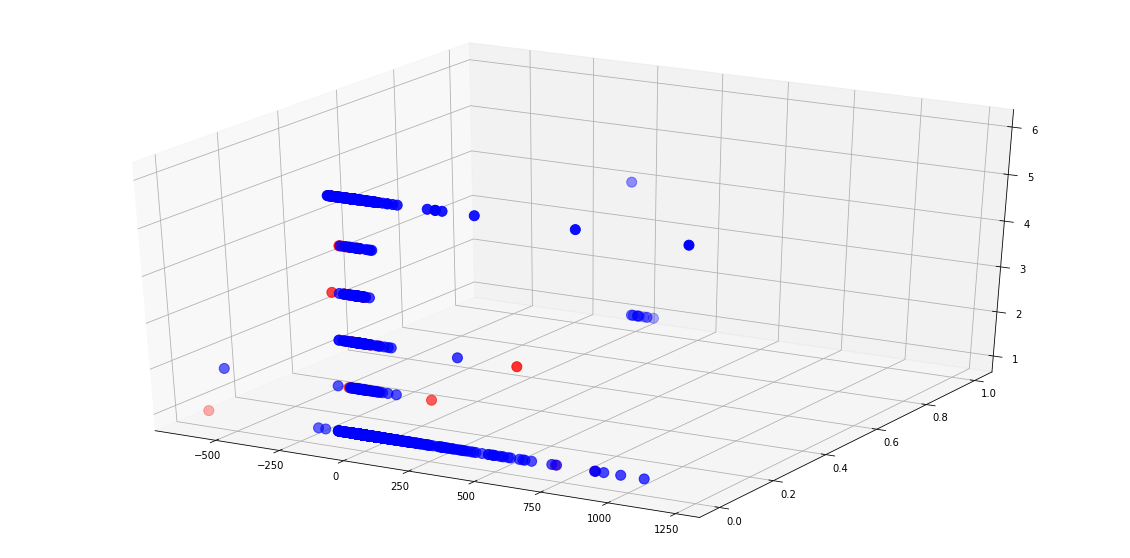

In [6]:
# This part is printing out the 3 most significant features to see if they could be differentiated
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
zdata = data.iloc[:,20].values
xdata = data.iloc[:,24].values
ydata = data.iloc[:,17].values
group = data.iloc[:,-1].values
cdict = {0:'blue',1:'red'}

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter3D(xdata[ix], ydata[ix], zdata[ix], c = cdict[g], label = g, s = 100)

In [7]:
group

array([1., 1., 1., ..., 0., 0., 0.])

In [8]:
train_indices = []
test_indices = []

for index,element in data.iterrows():
    if element[1] == 2013:
        test_indices.append(index)
    else:
        train_indices.append(index)
        
train_indices=np.array(train_indices)
train_indices=np.int_(train_indices)
test_indices=np.array(test_indices)
test_indices=np.int_(test_indices)

input_train = input[train_indices]
input_test = input[test_indices]
output_train = output[train_indices]
output_test = output[test_indices]     

In [9]:
# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

# train데이터를 넣어 복제함
input_train, output_train = sm.fit_sample(input_train,list(output_train))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(input_train)
input_train = scaler.transform(input_train)
input_test = scaler.transform(input_test)

## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier(n_neighbors=201)

## 모델평가

In [13]:
knn.fit(input_train, output_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=201, p=2,
           weights='uniform')

In [14]:
pred_train=knn.predict(input_train)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_train=confusion_matrix(output_train, pred_train)

In [17]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[4077  906]
 [ 906 4077]]


In [18]:
pred_test=knn.predict(input_test)

In [19]:
pred_test_prob=knn.predict_proba(input_test)

In [20]:
confusion_test=confusion_matrix(output_test, pred_test)

In [21]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[796 196]
 [ 10  39]]


In [22]:
from sklearn.metrics import classification_report

In [23]:
cfreport=classification_report(output_test, pred_test)

In [24]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
              precision    recall  f1-score   support

        0.0       0.99      0.80      0.89       992
        1.0       0.17      0.80      0.27        49

avg / total       0.95      0.80      0.86      1041



In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt 

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(output_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

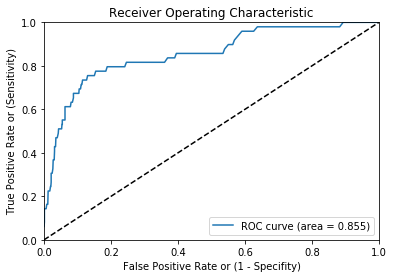

In [27]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")